In [1]:
import pickle
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
%load_ext autoreload
%autoreload 2
from DefinitionUtils import *

In [3]:
with open("mols.pkl", "rb") as file:
    mols_G = pickle.load(file)

In [4]:
tmp = mols_G[0][1]
tmp.nodes(data=True)

NodeDataView({'gg70000': {'type': 'root', 'label': '70000'}, 'gg70001': {'type': 'and', 'label': 'and'}, 'gg70003': {'type': 'sym', 'label': '15'}, 'gh1000': {'type': 'sub', 'label': '1000'}, 'gh1001': {'type': 'and', 'label': 'and'}, 'gh1002': {'type': 'sym', 'label': '17'}, 'gh1003': {'type': 'sym', 'label': '17'}, 'h500': {'type': 'sub', 'label': '500'}, 'h501': {'type': 'and', 'label': 'and'}, 'h502': {'type': 'sym', 'label': '18'}, 'h503': {'type': 'sym', 'label': '14'}})

In [5]:
tmp_dict = {v: v for i, v in enumerate(tmp.nodes())}

In [6]:
tmp_dict

{'gg70000': 'gg70000',
 'gg70001': 'gg70001',
 'gg70003': 'gg70003',
 'gh1000': 'gh1000',
 'gh1001': 'gh1001',
 'gh1002': 'gh1002',
 'gh1003': 'gh1003',
 'h500': 'h500',
 'h501': 'h501',
 'h502': 'h502',
 'h503': 'h503'}

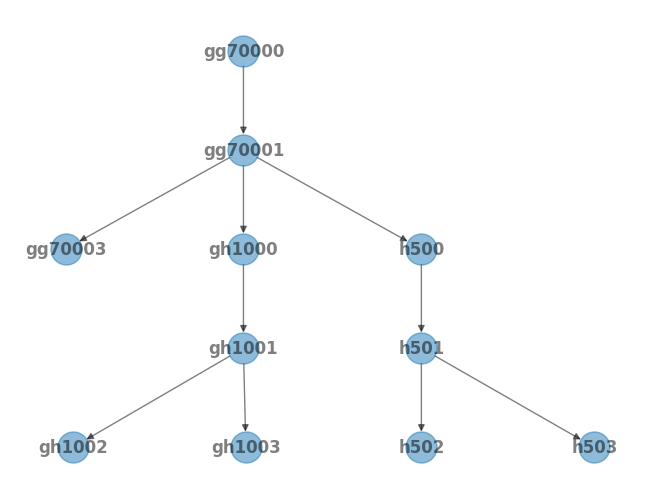

In [7]:
pos = graphviz_layout(tmp, prog="dot")
labels = tmp_dict
nx.draw(tmp, pos=pos,
    node_size=500, labels= labels,alpha=0.5, font_weight="bold", arrows=True)
# tady se generují kompozice

In [8]:
import custom.EnvironmentGeneration.Definition

dic_all = {}
mol_keys_dic = {}
mol_final_id_dic = {}
last_id_lower, last_id_upper = 10000,100000
for mol in mols_G.items():
    id, m = mol
    l, this_G = m
    dic_all, lsts,last_id_lower, last_id_upper,sym_id = get_mol_info(this_G, dic_all,last_id_lower+1, last_id_upper+1)
    mol_final_id_dic[id] = sym_id
    mol_keys_dic[id] = lsts


In [9]:
len(dic_all)

224

In [10]:
rewriten_dic_all = rewrite_dict(dic_all)
rewriten_dic_all

{(17, 17): ((17, 17), 10002),
 (14, 18): ((14, 18), 10003),
 (10002, 10003): ((10002, 10003), 100003),
 (15, 10003): ((15, 10003), 100005),
 (15, 10002): ((15, 10002), 100007),
 ((15,), (10002, 10003)): ((15, 100003), 100008),
 ((15, 10003), (10002,)): ((100005, 10002), 100008),
 ((15, 10002), (10003,)): ((100007, 10003), 100008),
 (11, 17): ((11, 17), 10005),
 (6, 8): ((6, 8), 10008),
 (1, 8): ((1, 8), 10010),
 (1, 6): ((1, 6), 10012),
 ((1,), (6, 8)): ((1, 10008), 10013),
 ((1, 8), (6,)): ((10010, 6), 10013),
 ((1, 6), (8,)): ((10012, 8), 10013),
 (3, 20): ((3, 20), 10016),
 (2, 20): ((2, 20), 10018),
 (2, 3): ((2, 3), 10020),
 ((2,), (3, 20)): ((2, 10016), 10021),
 ((2, 20), (3,)): ((10018, 3), 10021),
 ((2, 3), (20,)): ((10020, 20), 10021),
 (3, 10021): ((3, 10021), 100012),
 (8, 12): ((8, 12), 10023),
 (15, 10023): ((15, 10023), 100014),
 (0, 10021): ((0, 10021), 100018),
 (0, 3): ((0, 3), 100020),
 ((0,), (3, 10021)): ((0, 100012), 100021),
 ((0, 10021), (3,)): ((100018, 3), 1000

In [11]:
len(rewriten_dic_all)

224

In [12]:
clean_dic = {k:v for _,(k,v) in rewriten_dic_all.items()}

In [13]:
len(clean_dic)

224

In [14]:
rewritten_mol_keys_dic = {}
for k,v in mol_keys_dic.items():
    mol_dic = {}
    for i in v:
        pre,post = rewriten_dic_all[i]
        mol_dic[pre] = post
    rewritten_mol_keys_dic[k] = mol_dic

In [15]:
len(rewritten_mol_keys_dic[2])

6

In [16]:
len(get_complete_mol_keys(rewritten_mol_keys_dic[2],clean_dic))

6

In [17]:
complete_mol_keys_dic = {}
for k,v in rewritten_mol_keys_dic.items():
    complete_mol_keys_dic[k] = {'final_sym':mol_final_id_dic[k],
        'molecule_rules':get_complete_mol_keys(rewritten_mol_keys_dic[k],clean_dic)}
print(len(complete_mol_keys_dic[2]))
complete_mol_keys_dic[2]

2


{'final_sym': 10013,
 'molecule_rules': {(6, 8): 10008,
  (1, 10008): 10013,
  (1, 8): 10010,
  (10010, 6): 10013,
  (1, 6): 10012,
  (10012, 8): 10013}}

In [18]:
test_dic = {}
for k,v in complete_mol_keys_dic.items():
    v = v['molecule_rules']
    for k1,v1 in v.items():
        if k1 in test_dic:
            assert test_dic[k1] == v1
        test_dic[k1] = v1
assert test_dic == clean_dic

In [19]:
len('č')

1

In [20]:
complete_mol_keys_dic[2]

{'final_sym': 10013,
 'molecule_rules': {(6, 8): 10008,
  (1, 10008): 10013,
  (1, 8): 10010,
  (10010, 6): 10013,
  (1, 6): 10012,
  (10012, 8): 10013}}

In [21]:
with open("definition_dic.pkl", "wb") as file:
    pickle.dump({'all_dic':clean_dic,'mol_keys_dic':complete_mol_keys_dic},file)

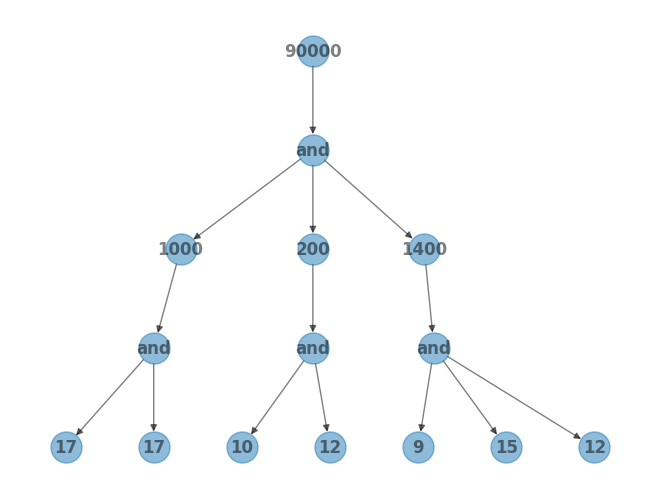

In [22]:
G = mols_G[25][1]
pos = graphviz_layout(G, prog="dot")
labels = nx.get_node_attributes(G, "label")
nx.draw(G, pos=pos,with_labels=True,labels=labels,
    node_size=500,alpha=0.5, font_weight="bold", arrows=True)

In [23]:
list(sorted(map(lambda x: (len(x[1]),x[0]),mol_keys_dic.items())))

[(1, 1),
 (1, 6),
 (1, 12),
 (1, 14),
 (1, 18),
 (1, 21),
 (1, 36),
 (1, 37),
 (1, 39),
 (1, 45),
 (1, 48),
 (2, 4),
 (2, 19),
 (2, 20),
 (2, 27),
 (2, 29),
 (2, 31),
 (2, 34),
 (2, 38),
 (2, 49),
 (3, 32),
 (3, 41),
 (6, 2),
 (6, 8),
 (6, 11),
 (7, 3),
 (7, 5),
 (7, 13),
 (7, 23),
 (7, 28),
 (7, 30),
 (7, 33),
 (7, 40),
 (7, 47),
 (8, 0),
 (8, 9),
 (8, 24),
 (8, 35),
 (8, 42),
 (8, 46),
 (9, 26),
 (9, 44),
 (12, 7),
 (12, 15),
 (12, 17),
 (12, 22),
 (12, 43),
 (14, 16),
 (14, 25),
 (18, 10)]

In [24]:
mols_G[3]

([None, None], <networkx.classes.digraph.DiGraph at 0x179f7f5e788>)